In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [336]:
dataset = pd.read_csv('C:\softwares\dataset\SocialNetworkAds.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [337]:
dataset.describe(include="all")

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


In [338]:
pd.isnull(dataset).sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

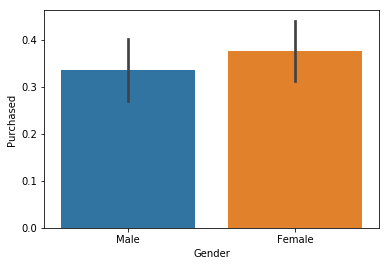

In [339]:
sns.barplot(x="Gender", y="Purchased", data=dataset)

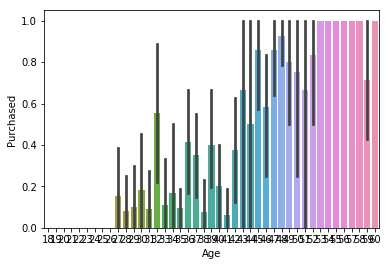

In [340]:
sns.barplot(x="Age", y="Purchased", data=dataset)

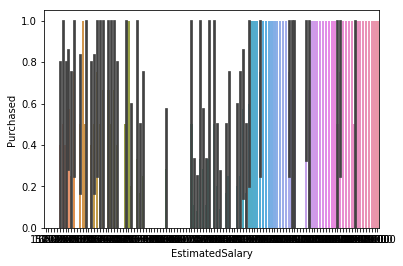

In [341]:
sns.barplot(x="EstimatedSalary", y="Purchased", data=dataset)

In [342]:
gender_map = {'Male':0, 'Female':1}
dataset['Gender'] = dataset['Gender'].map(gender_map)

In [343]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [344]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [345]:
from sklearn.utils import shuffle
dataset=shuffle(dataset)
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
318,15742204,0,45,32000,1
234,15619407,1,38,112000,0
11,15606274,1,26,52000,0
108,15720943,0,26,86000,0
162,15599533,1,37,33000,0


In [346]:
y = dataset['Purchased']
x= dataset.drop(["User ID","Purchased"], axis=1)

In [347]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [348]:
x.head()

,Gender,Age,EstimatedSalary
318,0,45,32000
234,1,38,112000
11,1,26,52000
108,0,26,86000
162,1,37,33000


In [349]:
y.head()

318    1
234    0
11     0
108    0
162    0
Name: Purchased, dtype: int64

In [350]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [351]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.85625

In [352]:
lr.score(x_test,y_test)

0.8375

In [353]:
testPred = lr.predict(x_test)

In [354]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(confusion_matrix(y_test, testPred))
print(f1_score(y_test, testPred, average="macro"))
print(precision_score(y_test, testPred, average="macro"))
print(recall_score(y_test, testPred, average="macro"))   

[[49  5]
 [ 8 18]]
0.8087883802169515
0.8211289092295957
0.7998575498575499


In [355]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)

0.96875

In [356]:
gbc.score(x_test,y_test)

0.9

In [357]:
gbc_testPred = gbc.predict(x_test)

In [358]:
print(confusion_matrix(y_test, gbc_testPred))
print(f1_score(y_test, gbc_testPred, average="macro"))
print(precision_score(y_test, gbc_testPred, average="macro"))
print(recall_score(y_test, gbc_testPred, average="macro")) 

[[48  6]
 [ 2 24]]
0.8901098901098901
0.88
0.905982905982906
